Here we are going to compare the integration for the Hu-Sawicki model (n=1) with different initial conditions.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import cumtrapz as cumtrapz

import os
import git
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
path_datos_global = os.path.dirname(path_git)
os.chdir(path_git); os.sys.path.append('./fr_mcmc/utils/')
from solve_sys import integrator
from supernovae import aparent_magnitude_th

from scipy.constants import c as c_light  # units of m/s
c_light_km = c_light/1000


In [2]:
H_0 = 70

def Hs_2_mu(zs,Hs):
    INT = cumtrapz(Hs**(-1), zs, initial=0)
    Dl = (c_light_km * (1 + zs)) * INT #Mpc
    mu = 25.0 + 5.0 * np.log10(Dl)
    return mu

Let's plot the Hubble parameter $H$ and the distance modulus $\mu$ vs the redshift $z$. 

/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" c

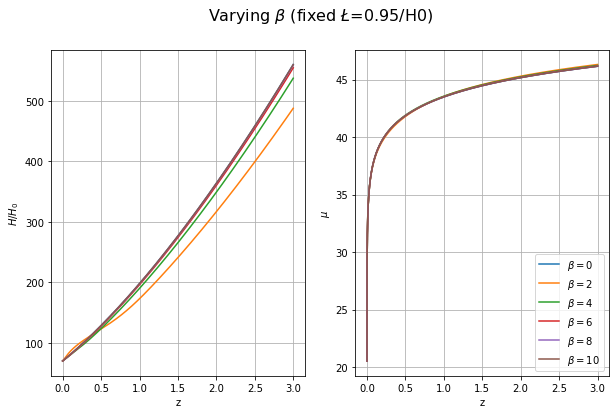

In [3]:
#Varying beta:
L_bar = 0.95 #fixed value in units of H_0
betas = np.array([0,1,2,3,4,5])*2

fig, ax = plt.subplots(1,2, figsize=(10,6))
fig.suptitle(r'Varying $\beta$ (fixed $\L$={}/H0)'.format(L_bar), fontsize=16)
ax[0].grid()
ax[1].grid()
for i, beta in enumerate(betas):
    params = [L_bar, beta, H_0] #L_bar in units of H_0
    zs, Hs = integrator(params)
    Dls = Hs_2_mu(zs,Hs)
    ax[0].plot(zs,Hs,label=r'$\beta = {}$'.format(beta))
    ax[1].plot(zs,Dls,label=r'$\beta = {}$'.format(beta))
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel(r'$H/H_0$')
ax[1].set_ylabel(r'$\mu$')
plt.legend()
plt.savefig(path_git+'/varying_beta.png')
plt.show()


/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarni

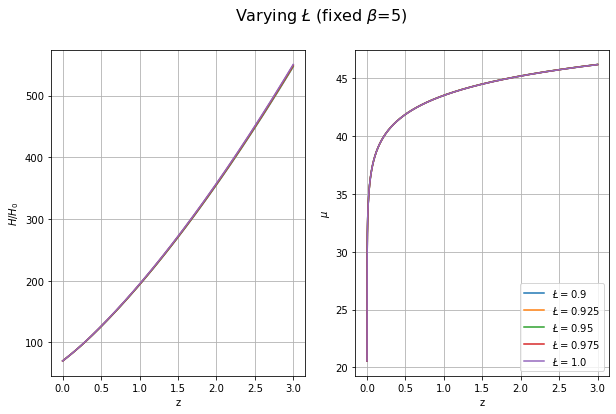

In [4]:
#Varying 
beta = 5 #fixed value
L_bars = np.linspace(0.9,1,5) #In units of H_0
fig, ax = plt.subplots(1,2, figsize=(10,6))
fig.suptitle(r'Varying $\L$ (fixed $\beta$={})'.format(beta), fontsize=16)
ax[0].grid()
ax[1].grid()
for i, Ls in enumerate(L_bars):
    params = [Ls, 5, H_0] #L_bar in units of H_0
    zs, Hs = integrator(params)
    Dls = Hs_2_mu(zs,Hs)
    ax[0].plot(zs,Hs,label=r'$\L = {}$'.format(Ls))
    ax[1].plot(zs,Dls,label=r'$\L = {}$'.format(Ls))
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel(r'$H/H_0$')
ax[1].set_ylabel(r'$\mu$')
plt.legend()
plt.savefig(path_git+'/varying_L.png')
plt.show()